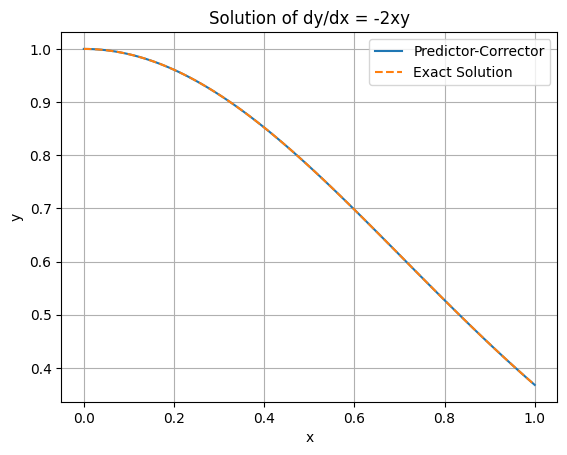

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return -2 * x * y

def predictor_corrector(y0, x0, h, N):
    # Initial lists for storing solutions and time points
    x = [x0]
    y = [y0]
    
    # Bootstrap using 4th order Runge-Kutta
    for i in range(1):
        k1 = h * f(x[-1], y[-1])
        k2 = h * f(x[-1] + 0.5 * h, y[-1] + 0.5 * k1)
        k3 = h * f(x[-1] + 0.5 * h, y[-1] + 0.5 * k2)
        k4 = h * f(x[-1] + h, y[-1] + k3)

        y.append(y[-1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6)
        x.append(x[-1] + h)
    
    for i in range(1, N):
        # Predictor (Adams-Bashforth 2-step method)
        y_predict = y[-1] + h * (1.5 * f(x[-1], y[-1]) - 0.5 * f(x[-2], y[-2]))
        x_predict = x[-1] + h
        
        # Corrector (Adams-Moulton 2-step method)
        y_correct = y[-1] + h/2 * (f(x[-1], y[-1]) + f(x_predict, y_predict))
        
        y.append(y_correct)
        x.append(x_predict)
    
    return x, y

# Parameters
x0 = 0.0
y0 = 1.0
h = 0.01
N = 100

x_vals, y_vals = predictor_corrector(y0, x0, h, N)

# Visualization
plt.plot(x_vals, y_vals, label="Predictor-Corrector")
plt.plot(x_vals, np.exp(-np.array(x_vals)**2), '--', label="Exact Solution")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("Solution of dy/dx = -2xy")
plt.grid(True)
plt.show()

Logistic Growth Differential Equation:
$ \frac{dP}{dt} = rP \left(1 - \frac{P}{K}\right) $

Where:

$ P(t) $ is the population at time $ t $. <br>
$ r $ is the growth rate. <br>
$ K $ is the carrying capacity of the environment. <br>


Exact Solution for Logistic Growth:
$ P(t) = \frac{K P_0 e^{rt}}{K + P_0 (e^{rt} - 1)} $ <br>

Where:

 $ P_0 $ is the initial population.


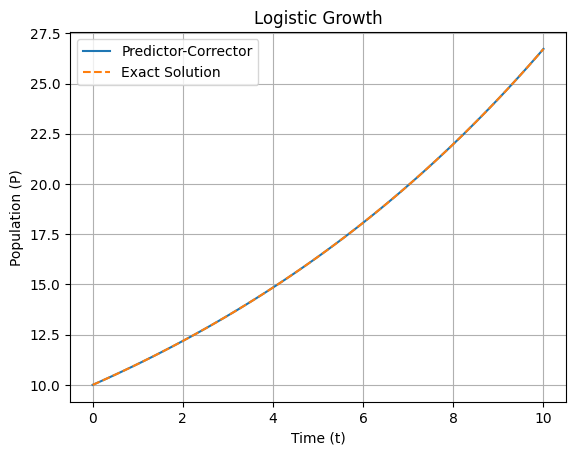

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_growth(t, P, r, K):
    return r * P * (1 - P / K)

def exact_solution(t, P0, r, K):
    return (K * P0 * np.exp(r * t)) / (K + P0 * (np.exp(r * t) - 1))

def predictor_corrector(y0, t0, h, N, r, K):
    t = [t0]
    P = [y0]
    
    # Bootstrap using 4th order Runge-Kutta
    for i in range(1):
        k1 = h * logistic_growth(t[-1], P[-1], r, K)
        k2 = h * logistic_growth(t[-1] + 0.5 * h, P[-1] + 0.5 * k1, r, K)
        k3 = h * logistic_growth(t[-1] + 0.5 * h, P[-1] + 0.5 * k2, r, K)
        k4 = h * logistic_growth(t[-1] + h, P[-1] + k3, r, K)

        P.append(P[-1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6)
        t.append(t[-1] + h)
    
    for i in range(1, N):
        # Predictor
        P_predict = P[-1] + h * (1.5 * logistic_growth(t[-1], P[-1], r, K) - 0.5 * logistic_growth(t[-2], P[-2], r, K))
        t_predict = t[-1] + h
        
        # Corrector
        P_correct = P[-1] + h/2 * (logistic_growth(t[-1], P[-1], r, K) + logistic_growth(t_predict, P_predict, r, K))
        
        P.append(P_correct)
        t.append(t_predict)
    
    return t, P

# Parameters
t0 = 0.0
P0 = 10.0
h = 0.1
N = 100
r = 0.1
K = 1000

t_vals, P_vals = predictor_corrector(P0, t0, h, N, r, K)

# Visualization
plt.plot(t_vals, P_vals, label="Predictor-Corrector")
plt.plot(t_vals, [exact_solution(t, P0, r, K) for t in t_vals], '--', label="Exact Solution")
plt.xlabel('Time (t)')
plt.ylabel('Population (P)')
plt.legend()
plt.title("Logistic Growth")
plt.grid(True)
plt.show()
